In [73]:
#importing the required libraries
import pyforest
import warnings
warnings.simplefilter("ignore")
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf,pacf
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

In [34]:
data=pd.read_csv("BRITANNIA.csv")
data.head()

<IPython.core.display.Javascript object>

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BRITANNIA,EQ,703.25,705.0,759.50,705.0,758.0,756.90,741.01,7512,5.566488e+11,NaN,NaN,NaN
1,2000-01-04,BRITANNIA,EQ,756.90,710.0,770.00,710.0,740.0,754.55,742.52,8135,6.040391e+11,NaN,NaN,NaN
2,2000-01-05,BRITANNIA,EQ,754.55,755.0,759.00,705.0,740.0,735.30,739.92,6095,4.509784e+11,NaN,NaN,NaN
3,2000-01-06,BRITANNIA,EQ,735.30,740.0,794.15,740.0,770.0,785.65,788.83,19697,1.553756e+12,NaN,NaN,NaN
4,2000-01-07,BRITANNIA,EQ,785.65,808.0,848.50,798.0,848.5,848.50,827.53,33107,2.739708e+12,NaN,NaN,NaN


In [35]:
#we will use the previous close column as our main column for what target will the stock price  will close for that particular day
#data cleaning
stock=data.dropna()

In [36]:
#converting date as the datatime index
stock.index=pd.to_datetime(stock.Date)
stock.head()

<IPython.core.display.Javascript object>

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,,
2011-06-01,2011-06-01,BRITANNIA,EQ,420.50,422.00,429.0,417.10,420.95,421.15,422.76,100155,4.234168e+12,3553.0,40154.0,0.4009
2011-06-02,2011-06-02,BRITANNIA,EQ,421.15,416.90,436.3,414.40,435.00,431.90,427.90,135819,5.811712e+12,3816.0,78060.0,0.5747
2011-06-03,2011-06-03,BRITANNIA,EQ,431.90,434.80,451.0,434.75,445.55,445.05,444.82,219260,9.753129e+12,8911.0,70825.0,0.3230
2011-06-06,2011-06-06,BRITANNIA,EQ,445.05,447.25,452.0,433.15,448.05,447.65,445.76,90153,4.018641e+12,3540.0,36602.0,0.4060
2011-06-07,2011-06-07,BRITANNIA,EQ,447.65,448.40,448.4,441.10,446.90,445.95,445.28,42569,1.895502e+12,1688.0,25938.0,0.6093


In [37]:
#dropping unnecessary columns  and accesing a range of data that i want to use
stock=stock["Prev Close"]["2013-01-01":"2013-12-2"]
stock.describe()

count    230.000000
mean     657.197609
std      141.660731
min      465.000000
25%      524.950000
50%      674.700000
75%      741.712500
max      948.600000
Name: Prev Close, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

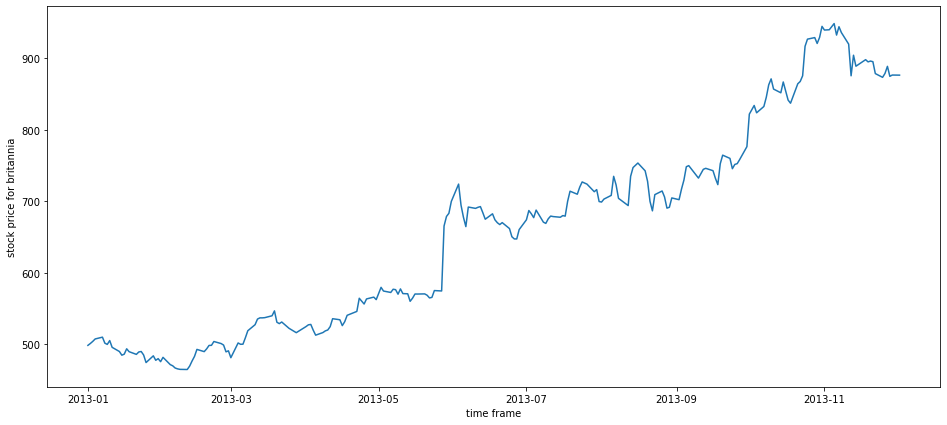

In [38]:
#data exploration
plt.figure(figsize=(16,7))
fig=plt.figure(1)
ax1=fig.add_subplot(111)
ax1.set_xlabel('time frame')
ax1.set_ylabel('stock price for britannia')
ax1.plot(stock)
#the plot below show that there are some  upward trend component but the seasomnality component is  not that much

# checking the stationarity of the  time seris data
 There are tow methods of checking the stationarity of the data  which includes rolling statistics or duckey fuller test. in  this data i will use the rolling statistics

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

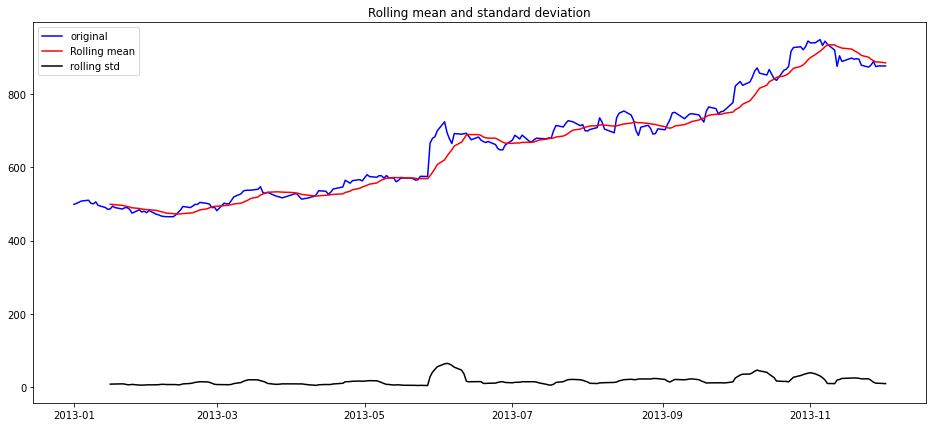

In [39]:
#determining the rolling statistics
rollmean=stock.rolling(12).mean()
rollstd=stock.rolling(12).std()

plt.figure(figsize=(16,7))
fig=plt.figure(1)

#ploting the rolling statistics
original=plt.plot(stock,color='blue',label='original')
mean=plt.plot(rollmean,color='red',label='Rolling mean')
std=plt.plot(rollstd,color='black',label='rolling std')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation')
plt.show(block=False)



# Rolling statistics
it help to ananlyse the two conditions of the stationarity that is the maen and the variance where from the plot above we can see the standard deviation is constant  all the time but the  rolling mean is not constant.

 for the series to be stationary the mean and the variance should be  constant all the time. therefore our series is not stationary.

# making series stationary
 we can make the series stationary by making log_transformation
 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

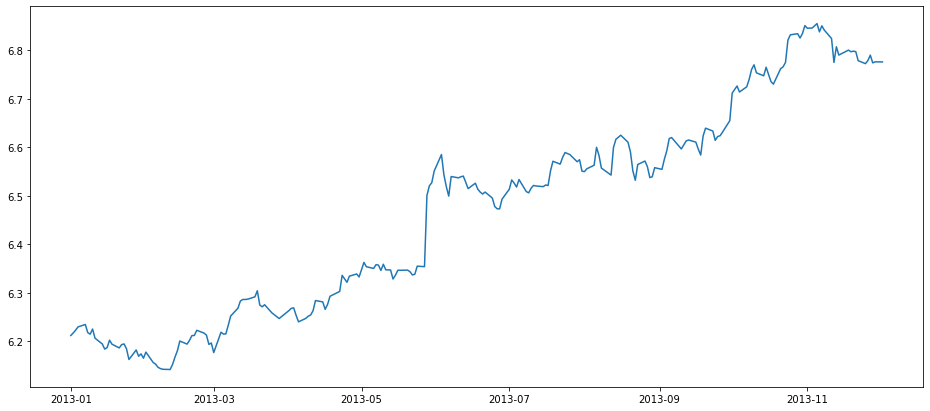

In [40]:
plt.figure(figsize=(16,7))
fig=plt.figure(1)
#using log trasformation
ts_log=np.log(stock)
plt.plot(ts_log)

however the plot above is not stationary even after using the log transformation but we can decompose to seasonal component

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

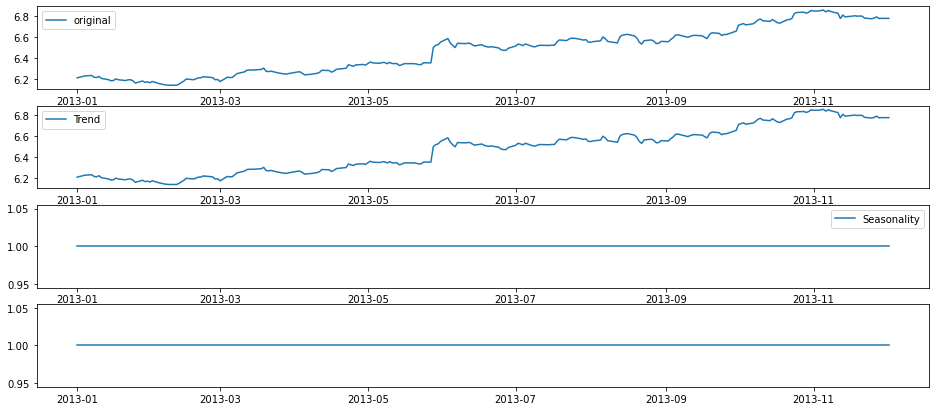

In [42]:
#decomposition
decomposition=seasonal_decompose(ts_log,freq=1, model='multiplicative')

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.figure(figsize=(16,7))
fig=plt.figure(1)

plt.subplot(411)
plt.plot(ts_log,label='original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')


From the above plots its evident that the trend component is contributing alot to the original time series, but still  the series is not stationary

# differencing time series,
this involves shifting the time series and then subtracting from the original time series data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

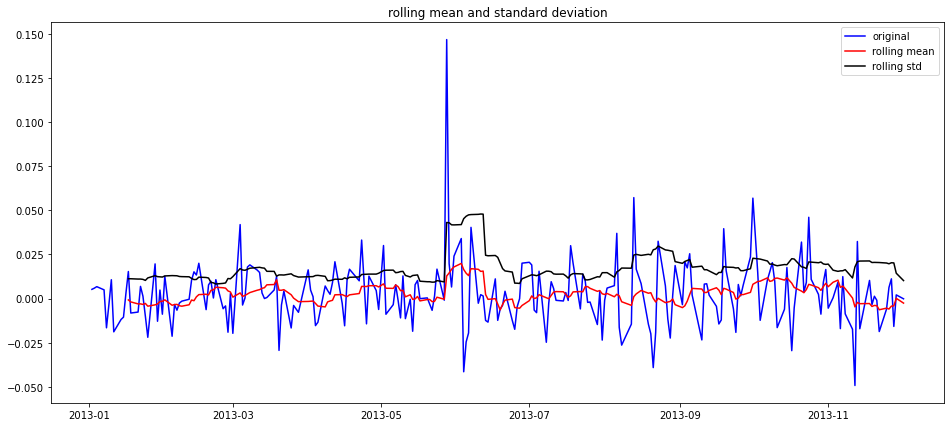

In [57]:
plt.figure(figsize=(16,7))
fig=plt.figure(1)
# using the differencing  by shifting by 1
ts_log_diff=ts_log - ts_log.shift()

#determining the rolling statistics
rollmean=ts_log_diff.rolling(12).mean()
rollstd=ts_log_diff.rolling(12).std()

#plotting the rolling statistics
original=plt.plot(ts_log_diff,color='blue',label='original')
mean=plt.plot(rollmean,color='red',label='rolling mean')
std=plt.plot(rollstd,color='black',label='rolling std')
plt.legend(loc='best')
plt.title("rolling mean and standard deviation")
plt.show(block=False)

using differenced time series has  resulted to stationarity in  data such that there is no upward pattern in mean and the standard deviation enabling the model to fit well in the  time series.

# Autocorrelation and Auto regression
 a model is said t be autoregressive if it can predict the future values based on the past values.
 
we can use ACF(auto correlation plot) an PACF(partial auto correlation plot) to determine what will be your order of AR and MA component in the arima model. 

plotting the ACF na d PACF helps is in determining the order of AR and MA
 

In [59]:
lag_acf=acf(ts_log_diff,nlags=20)
lag_pacf=pacf(ts_log_diff,nlags=20)

<IPython.core.display.Javascript object>

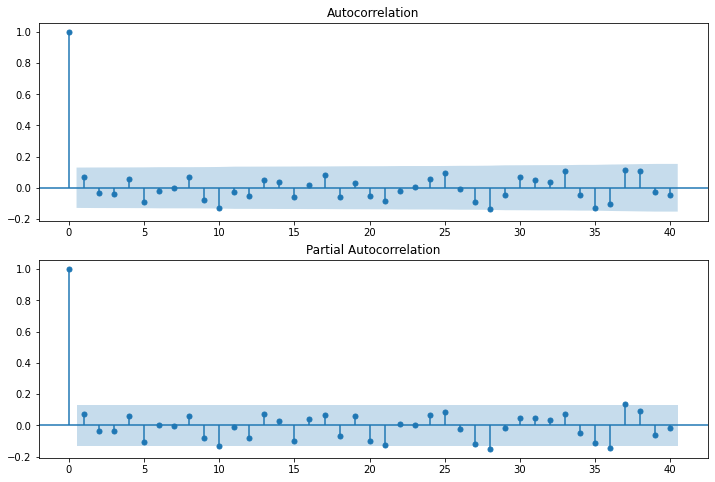

In [64]:
#plotting the acf and pacf
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
#plotting the acf
fig=sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags=40, ax=ax1)
#plotting the pacf
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags=40, ax=ax2)

having plotted the acf and pcf  in this i will take the order of 5,1,5 as p,d,q respectively

# model training using the ARIMA model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

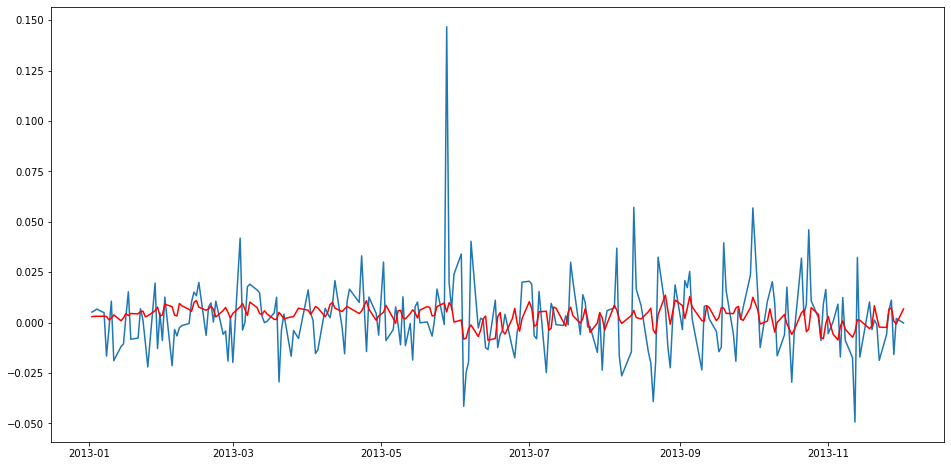

In [78]:
plt.figure(figsize=(16,8))
model=ARIMA(ts_log, order=(5,1,5))
results_ARIMA=model.fit(disp=1)
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues,color='red')

 the plot above shows how the time series model is   fitting on the data where the red one is the fitted values while the blue one is the actual values